### Orr-Sommerfeld eqs - cylinder flow 

    data = https://www.ece.umn.edu/users/mihailo/software/dmdsp/download.html

In [2]:
%run DMD_functions.ipynb
%run Hemati_DMD_functions.ipynb

import pydmd

In [3]:
from scipy.io import loadmat

podaci = loadmat('channel.mat')

# Display the variable names in the .mat file
print(podaci.keys())

dt = np.array(podaci['dT'][0,0])
os = podaci['Eos']
s=podaci['S']
v=podaci['V']
ux = podaci['UstarX1']

podaci2 = loadmat('x0.mat')
x0=podaci2['x0']

del (podaci, podaci2)

xfull = loadmat('channel_xfull.mat')
xfull = xfull['X']
xfull.shape

dict_keys(['__header__', '__version__', '__globals__', 'UstarX1', 'S', 'V', 'dT', 'Eos'])


(150, 101)

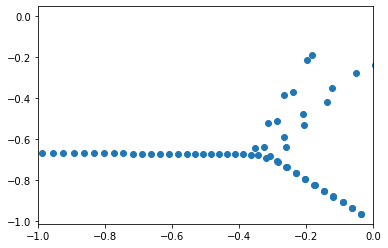

In [4]:
import matplotlib.pyplot as plt


plt.scatter(np.real(os), np.imag(os))
plt.xlim((-1,0))
plt.show()

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\pydmd\snapshots.py:74: UserWarning: Input data condition number 5.758914725941411e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  f"Input data condition number {cond_number}. "
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\pydmd\snapshots.py:74: UserWarning: Input data condition number 5.043223748163143e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  f"Input data condition number {cond_number}. "


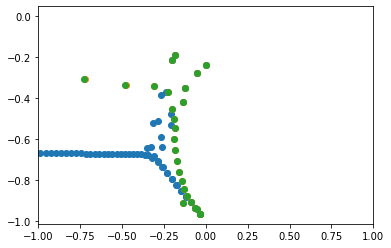

In [5]:
Z, L, r, _, _ = GEDMDQ(xfull, k=26)

dmd1 = pydmd.DMD(svd_rank=26)
dmd1.fit(xfull[:,:100], xfull[:,1:101])
dmd1.dmd_time['tend']=100
dmd1.reconstructed_data.shape

plt.scatter(np.real(os), np.imag(os)) #real orr-sommerfeld eigs
plt.scatter(np.real(np.log(L)), np.imag(np.log(L))) #treba log L / dt, kod nas dt=1
plt.scatter(np.real(np.log(dmd1.eigs)), np.imag(np.log(dmd1.eigs)))
plt.xlim(-1,1)
plt.show()

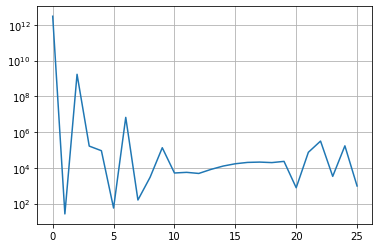

In [6]:
plt.plot(1/r)
plt.yscale('log')
plt.grid()
plt.show()

In [ ]:
threshold = 1e-1
indices = np.where(r<threshold)[0]
times=[i for i in range(101)]

reconstructed = DMD_reconstruction(xfull, Z, indices, L, times, real=False) ## sada dobro radi
reconstructed-xfull

##bolje za veliki threshold (npr. 1e-1 umjesto 1e-6, 1e-8)
## bolje realni dio aprox nego imaginarni.., npr za threshold = 1e-1:
#  8.47333220e-16-2.95758635e-06j,  2.49252870e-15-3.40053401e-06j, -2.72402492e-15-2.25934521e-06j,...

#dmd1.reconstructed_data - xfull
#pydmd bolje aproksimira.. zasto..

array([[ 9.79935805e-16-1.72070508e-17j,  2.65299528e-15-1.54124209e-15j,
        -2.53653672e-15-2.25259391e-15j, ...,
        -4.48558156e-16+3.25382624e-16j, -3.94614862e-16-1.62646335e-15j,
        -4.28649121e-15-4.36323696e-15j],
       [-7.70461169e-17+7.13540555e-18j,  3.42983969e-16-1.22379320e-16j,
        -2.01330922e-15+1.28729357e-15j, ...,
        -6.29467453e-16-4.71756694e-16j, -6.51195542e-16-9.99634403e-17j,
        -3.81000925e-16-2.17287668e-16j],
       [-4.05410297e-16-1.67780286e-17j,  8.23993651e-17-1.59919820e-17j,
        -9.55697110e-16+1.19527869e-15j, ...,
         1.55664327e-16-2.05944203e-16j,  6.41237822e-16-2.36898175e-16j,
         1.82532720e-15-1.47305128e-15j],
       ...,
       [-2.39174999e-16+2.31477164e-16j, -5.38523219e-16+3.97583713e-16j,
         4.11996826e-16-1.07772406e-15j, ...,
         1.47614126e-16+3.30952713e-16j, -7.24870467e-16+3.28513258e-16j,
        -2.13974753e-15+2.34035881e-15j],
       [-4.71898996e-17+4.55635963e-17j, -1.

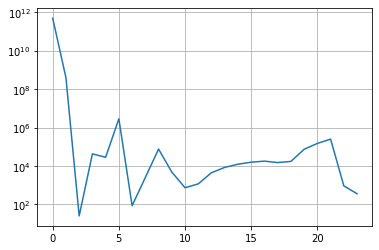

array([[ 8.57399572e-16+2.78581513e-16j,  2.64895239e-15-1.66215181e-15j,
        -1.62796090e-15-1.31012915e-15j, ...,
        -5.45904264e-17-8.11152632e-17j, -3.80355698e-16-7.11564427e-16j,
        -1.74465105e-15-8.18266861e-16j],
       [ 3.13907022e-16+4.90804771e-16j,  1.65777223e-15-1.71736269e-15j,
        -8.06036553e-16+5.69841754e-15j, ...,
        -6.36887461e-16-9.24390772e-16j,  5.24011851e-16-1.54158641e-15j,
         6.43936046e-16-4.78095211e-15j],
       [ 1.43377606e-15+2.20786930e-15j,  8.28043146e-15-7.50967214e-15j,
         1.28922480e-15+2.37998369e-14j, ...,
        -2.72893687e-16-2.28641975e-15j,  7.37992024e-15-7.98373954e-15j,
         7.27770539e-15-2.83721072e-14j],
       ...,
       [ 2.04166111e-15-2.66442684e-16j, -1.13393453e-14+1.61690729e-14j,
         1.31589618e-15-4.44236661e-14j, ...,
        -7.86534466e-16+6.57210831e-15j, -1.99568416e-14+1.24564530e-14j,
        -3.37679713e-14+5.26649579e-14j],
       [ 4.05085037e-16-5.31936691e-17j, -2.

In [9]:
Z, L, r, _, _ = GEDMDQ(xfull)

plt.plot(1/r)
plt.yscale('log')
plt.grid()
plt.show()

indices = np.where(r<1)[0] #uzimam ih sve
times=[i for i in range(101)]

reconstructed = DMD_reconstruction(xfull, Z, indices, L, times, real=False)
reconstructed-xfull

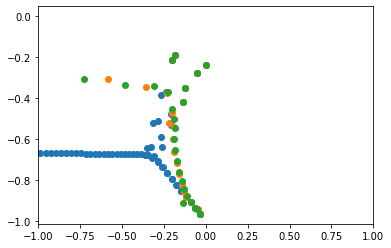

In [8]:
plt.scatter(np.real(os), np.imag(os)) #real orr-sommerfeld eigs
plt.scatter(np.real(np.log(L)), np.imag(np.log(L))) #treba log L / dt, kod nas dt=1
plt.scatter(np.real(np.log(dmd1.eigs)), np.imag(np.log(dmd1.eigs)))
plt.xlim(-1,1)
plt.show()

### DODAVANJE snapshotova i oduzimanje

(19,) 

NameError: name 'x_os' is not defined

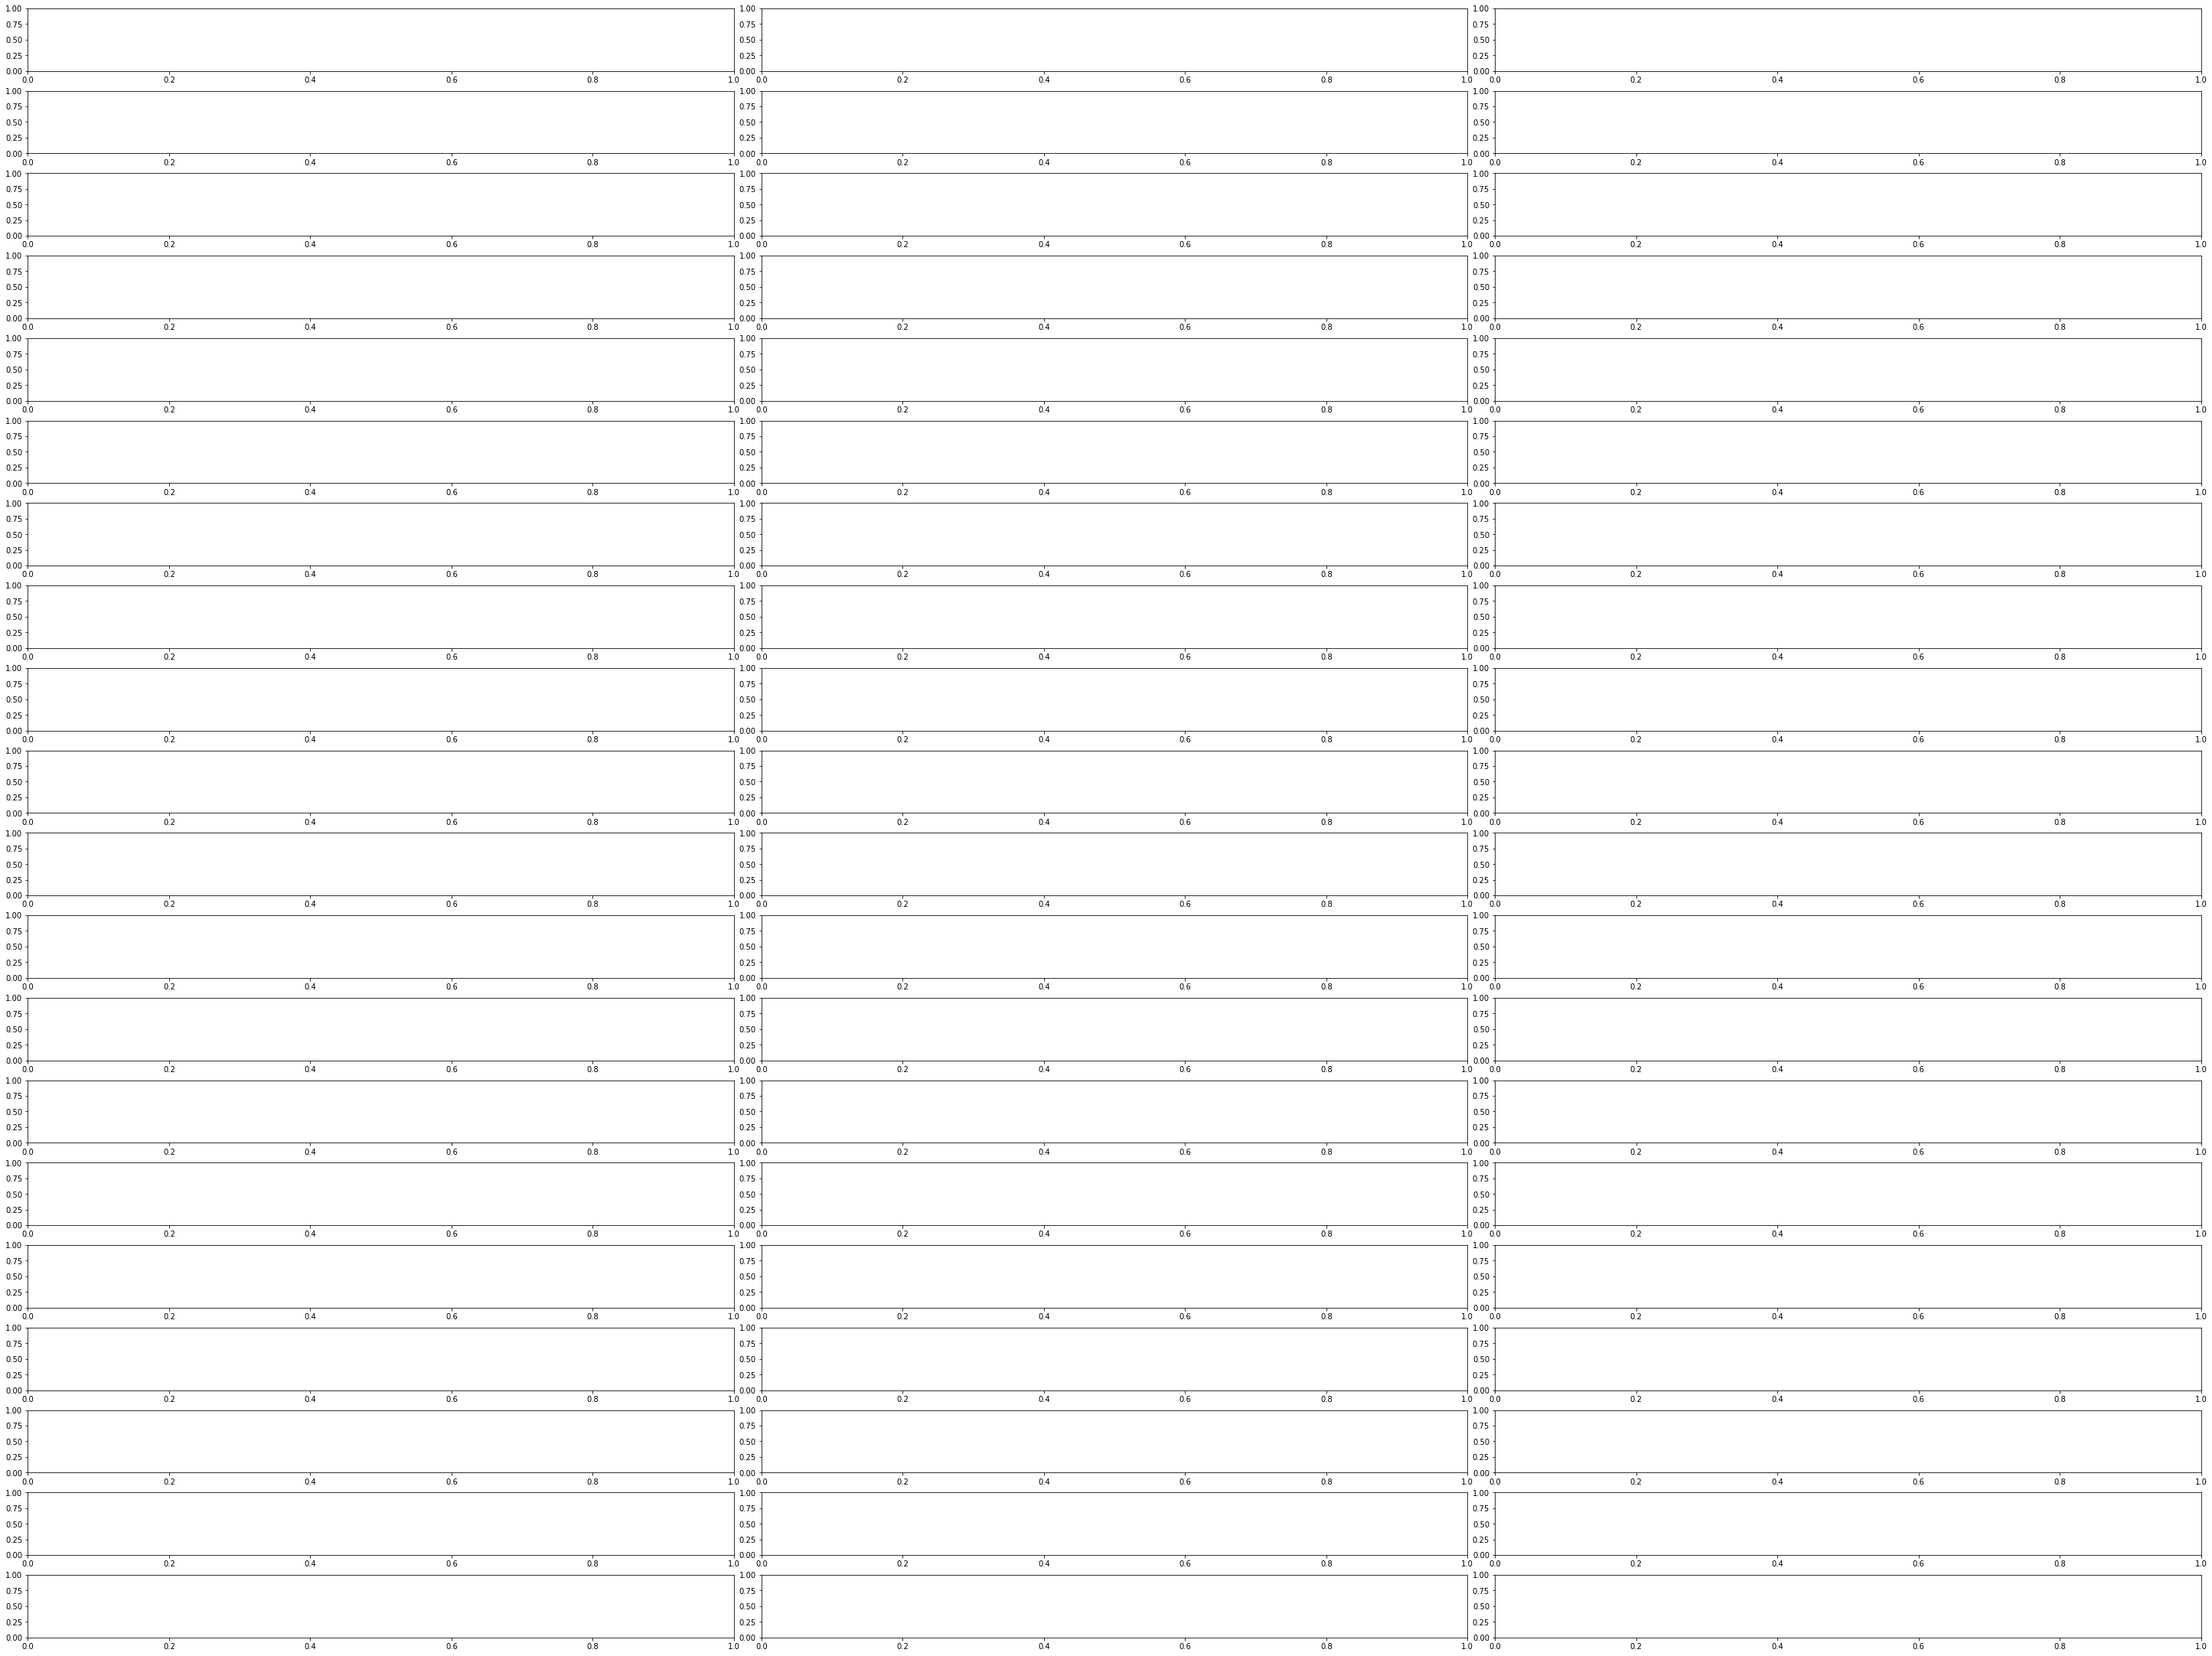

In [9]:
############################################################################################################
####        dodavanje Hemati usp sa dodavanje nase
####        ne dodajem
#           xfull = 150 x 101
############################################################################################################
m=xfull.shape[1]

koliko_dodajem=1
koliko_predvidam=1
poc = 130
poc = 50

fig, axs = plt.subplots(20, 3*koliko_predvidam, figsize=(40,30), squeeze=True)
plt.tight_layout(pad=0.5)

Z, L, r, Q, R = GEDMDQ(xfull[:,:poc])

threshold=1
indices = np.where(r < threshold)[0]
print(indices.shape, end=" ")

times=[i for i in range(poc, poc+koliko_predvidam)]

predicted=DMD_reconstruction(xfull[:,:poc], Z, indices, L, times)
predicted_H = DMD_reconstruction(xfull[:,:poc], Z, indices, L, times)

tol=1e-6
U_x, Sigma, _ = np.linalg.svd(xfull[:,:poc-1],full_matrices=False) 
k=poc
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_x = U_x[:, :k]

U_y, Sigma, _ = np.linalg.svd(xfull[:,1:poc],full_matrices=False) 
k=poc
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_y = U_y[:, :k]

X_tilda=U_x.T@xfull[:,:poc-1]; Y_tilda=U_y.T@xfull[:,1:poc]
A = Y_tilda@X_tilda.T; Gx=X_tilda@X_tilda.T; Gy = Y_tilda@Y_tilda.T

x=xfull[:,poc-1:poc]

for j in range(koliko_predvidam):
    #nase
    c1=axs[0,3*j].pcolormesh(x_os, y_os, predicted[:,j].reshape((-1,199)).T, cmap='hsv', vmin=-5, vmax=5)
    axs[0,3*j].set_title("nas; next {}".format(j+1))
    axs[0,3*j].set_xticks([]); axs[0,3*j].set_yticks([])
    plt.colorbar(c1, ax=axs[0,3*j], orientation='vertical')
    #predvideno Hemati
    c2=axs[0,3*j+1].pcolormesh(x_os, y_os, (predicted_H[:,j]).reshape((-1,199)).T, cmap='hsv', vmin=-5, vmax=5)
    axs[0,3*j+1].set_title("Hemati; next {}".format(j+1))
    axs[0,3*j+1].set_xticks([]); axs[0,3*j].set_yticks([])
    plt.colorbar(c2, ax=axs[0,3*j+1], orientation='vertical')

    c3=axs[0,3*j+2].pcolormesh(x_os, y_os, (predicted[:,j]-predicted_H[:,j]).reshape((-1,199)).T, cmap='hsv')
    axs[0,3*j+2].set_xticks([]); axs[0,3*j].set_yticks([])
    res=np.linalg.norm(predicted[:,j]-predicted_H[:,j])
    axs[0,3*j+2].set_title("(predicted-real) next {0}, res={1}".format(j+1, np.format_float_scientific(res, precision=2)))
    plt.colorbar(c3, ax=axs[0,3*j+2], orientation='vertical')

br=0

for i in range(poc, 151-koliko_dodajem, koliko_dodajem): 
    if(br==19):
        break

    times=[i for i in range(i, i+koliko_predvidam)]
    #_, _, _, Q, R, _ = DMD_discarding_snap(koliko_dodajem, Q, R, tol=1e-6)

    y=xfull[:,i:(i+koliko_dodajem)]
    
    Z,L, r,Q,R = DMD_added_snap(xfull[:,i:(i+koliko_dodajem)], Q, R, tol=1e-6) 

    indices = np.where(r < threshold)[0]
    predicted=DMD_reconstruction(xfull[:,:i+koliko_dodajem], Z, indices, L, times)
                                                                                    
    
    U_x, U_y, A, Gx, Gy = Hemati_update(U_x, U_y, A, Gx, Gy, x, y) 
    Zh, Lh = Hemati_compute_modes(U_x, U_y, A, Gx)

    indices2 = np.where(abs(Lh) < 1e6)[0]
    predicted_H = DMD_reconstruction(xfull[:,:i+koliko_dodajem], Zh, indices2, Lh, times)

    x=y
    br+=1
    for j in range(koliko_predvidam):
    #nase
        c1=axs[br,3*j].pcolormesh(x_os, y_os, predicted[:,j].reshape((-1,199)).T, cmap='hsv', vmin=-5, vmax=5)
        plt.colorbar(c1, ax=axs[br,3*j], orientation='vertical')
        axs[br,3*j].set_xticks([]); axs[br,3*j].set_yticks([])
    #predvideno Hemati
        c2=axs[br,3*j+1].pcolormesh(x_os, y_os, (predicted_H[:,j]).reshape((-1,199)).T, cmap='hsv', vmin=-5, vmax=5)
        plt.colorbar(c2, ax=axs[br,3*j+1], orientation='vertical')
        axs[br,3*j+1].set_xticks([]); axs[br,3*j].set_yticks([])
    #rezidual
        c3=axs[br,3*j+2].pcolormesh(x_os, y_os, (predicted[:,j]-predicted_H[:,j]).reshape((-1,199)).T, cmap='hsv')
        res=np.linalg.norm(predicted[:,j]-predicted_H[:,j])
        plt.colorbar(c3, ax=axs[br,3*j+2], orientation='vertical')
        axs[br,3*j+2].set_title("res = {}".format(np.format_float_scientific(res, precision=2)))
        axs[br,3*j+2].set_xticks([]); axs[br,3*j].set_yticks([])

#threshold 1, tol=1e-6 (otprilike k=44)
    #ako dodajem vise odjednom - losije procjene
    #povecala sam window - i dalje greske otprilike iste

#threshold 1e-4 i k=44, u dodavanju i oduzimanju tol = 1e-6
    #stalno isto, ako previse smanjim threshold onda losije (vec 1e-5)

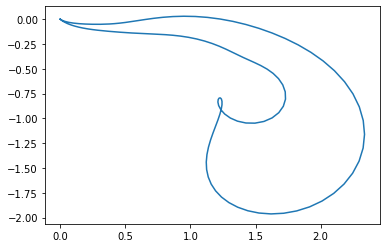

In [13]:
brojac=5
plt.plot(np.real(xfull[:,brojac]), np.imag(xfull[:,brojac]))
plt.show()